<a href="https://colab.research.google.com/github/parthib22/colaboratory/blob/main/bone_cancer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics roboflow opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="p4j33hpzHmY3bWLP2F6O")
project = rf.workspace("modern-academy-for-engineering-and-technology-u9m8v").project("bone-cancer-segmentation")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BONE-CANCER-SEGMENTATION-1 in yolov11:: 100%|██████████| 3878/3878 [00:00<00:00, 9639.22it/s]


In [ ]:
from ultralytics import YOLO

# Load the base model
model = YOLO("yolo11n-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.90M/5.90M [00:00<00:00, 72.7MB/s]


In [ ]:
# Train the model
train_results = model.train(
    data="/content/BONE-CANCER-SEGMENTATION-1/data.yaml",
    epochs=10,
)

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/BONE-CANCER-SEGMENTATION-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

train: Scanning /content/BONE-CANCER-SEGMENTATION-1/train/labels.cache... 1791 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1791/1791 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/BONE-CANCER-SEGMENTATION-1/valid/labels.cache... 72 images, 1 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.52G      1.984       3.33      2.949      2.194         16        640: 100%|██████████| 112/112 [00:44<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         72         76      0.345      0.325      0.259     0.0993      0.344      0.316      0.278     0.0913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10       4.5G       2.03      3.356      2.821      2.284         15        640: 100%|██████████| 112/112 [00:40<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         72         76      0.168      0.224     0.0956     0.0316      0.163      0.224      0.092       0.03



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.51G      2.065      3.367      2.765      2.302         21        640: 100%|██████████| 112/112 [00:41<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         72         76      0.113      0.276      0.106     0.0451      0.113      0.263     0.0916     0.0315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10       4.5G      2.034      3.276      2.665      2.268         22        640: 100%|██████████| 112/112 [00:40<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         72         76      0.227      0.382      0.223     0.0748      0.287      0.382      0.251     0.0996



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10       4.5G      1.969      3.204       2.56        2.2         15        640: 100%|██████████| 112/112 [00:39<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         72         76      0.404      0.289      0.326      0.138      0.424      0.382      0.347      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10       4.5G      1.904      3.073      2.431      2.134         15        640: 100%|██████████| 112/112 [00:42<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         72         76      0.326      0.362        0.3        0.1      0.309      0.329      0.267     0.0898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10       4.5G       1.85      2.963      2.338      2.102         15        640: 100%|██████████| 112/112 [00:39<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         72         76      0.314      0.446      0.395      0.167      0.343      0.382      0.376      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10       4.5G      1.772      2.902       2.22      2.019         15        640: 100%|██████████| 112/112 [00:42<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         72         76      0.512      0.461      0.449      0.187      0.523      0.474      0.456       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10       4.5G      1.699      2.749      2.085      1.942         17        640: 100%|██████████| 112/112 [00:40<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         72         76      0.471      0.434      0.403      0.161      0.465      0.434      0.404      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10       4.5G      1.656      2.686      2.013      1.921         15        640: 100%|██████████| 112/112 [00:39<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]


                   all         72         76      0.451      0.513      0.535      0.231      0.479      0.531      0.545      0.224

10 epochs completed in 0.121 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.0MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


                   all         72         76      0.452      0.513      0.538      0.232      0.492      0.526      0.548      0.225
Speed: 0.4ms preprocess, 5.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/segment/train2


In [ ]:
!zip -r /content/runs.zip /content/runs

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
model.val()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/BONE-CANCER-SEGMENTATION-1/valid/labels.cache... 72 images, 1 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


                   all         72         76      0.152     0.0789     0.0557      0.018     0.0611     0.0526     0.0197     0.0054
Speed: 0.4ms preprocess, 17.7ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/segment/val


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a3ed15f0340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

femur_fibrosarcoma_9_PNG.rf.a1b05632c34adfe5670076a07d1419df.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femur_fibrosarcoma_9_PNG.rf.a1b05632c34adfe5670076a07d1419df.jpg: 640x640 (no detections), 63.1ms
Speed: 3.2ms preprocess, 63.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


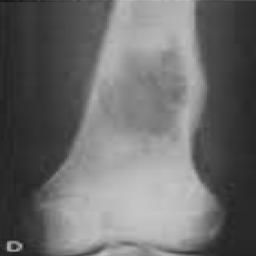

hand_osteosarcoma_17_png.rf.3f734c8c1ce278010a84a3064bb2f6e3.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/hand_osteosarcoma_17_png.rf.3f734c8c1ce278010a84a3064bb2f6e3.jpg: 640x640 1 cancer, 42.6ms
Speed: 3.9ms preprocess, 42.6ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


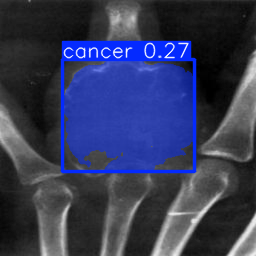

hand_encondroma_7_png.rf.9b87e3e4aa8f7f4e7c6eaa3963a80b63.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/hand_encondroma_7_png.rf.9b87e3e4aa8f7f4e7c6eaa3963a80b63.jpg: 640x640 5 cancers, 46.4ms
Speed: 3.2ms preprocess, 46.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


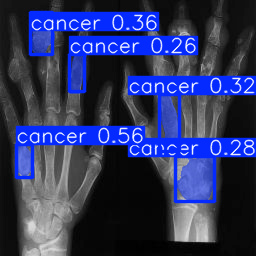

ped_21_png.rf.4c5543b971f1c36903d052fc1a19a4a6.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/ped_21_png.rf.4c5543b971f1c36903d052fc1a19a4a6.jpg: 640x640 (no detections), 37.8ms
Speed: 3.0ms preprocess, 37.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


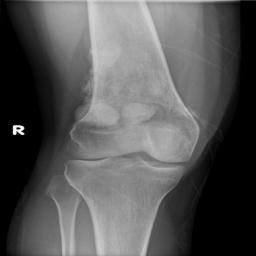

fibula_ewing_21_png.rf.3e2e0f855f8c9d4a5f4b5029868202b9.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/fibula_ewing_21_png.rf.3e2e0f855f8c9d4a5f4b5029868202b9.jpg: 640x640 1 cancer, 35.4ms
Speed: 3.2ms preprocess, 35.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


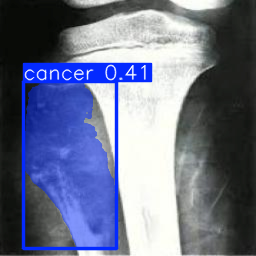

fibula_metastasis_10_png.rf.4106a8f6b8b46bc7e123bbe8523c970d.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/fibula_metastasis_10_png.rf.4106a8f6b8b46bc7e123bbe8523c970d.jpg: 640x640 1 cancer, 48.5ms
Speed: 3.0ms preprocess, 48.5ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


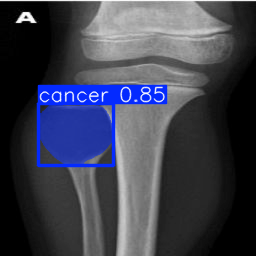

fibula_osteosarcoma_3_PNG.rf.3393067ba829b56587b434ff381352d3.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/fibula_osteosarcoma_3_PNG.rf.3393067ba829b56587b434ff381352d3.jpg: 640x640 2 cancers, 40.7ms
Speed: 3.1ms preprocess, 40.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


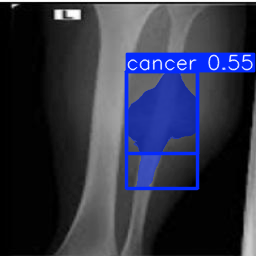

pelvis_osteosarcoma_10_png.rf.2b2a8f7005a06b062d8395e3ff6f3961.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/pelvis_osteosarcoma_10_png.rf.2b2a8f7005a06b062d8395e3ff6f3961.jpg: 640x640 (no detections), 34.4ms
Speed: 3.0ms preprocess, 34.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


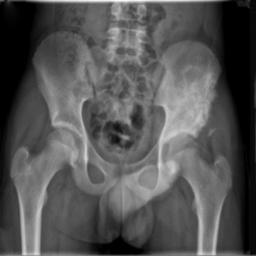

femur_metastasis_4_PNG.rf.857f2c13db99234b785ab914caa4579e.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femur_metastasis_4_PNG.rf.857f2c13db99234b785ab914caa4579e.jpg: 640x640 (no detections), 30.6ms
Speed: 3.1ms preprocess, 30.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


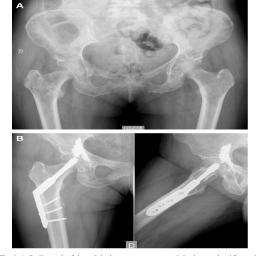

foot_39_png.rf.8f2b01f11189adbfc4faafdfd983c637.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/foot_39_png.rf.8f2b01f11189adbfc4faafdfd983c637.jpg: 640x640 1 cancer, 30.5ms
Speed: 3.1ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


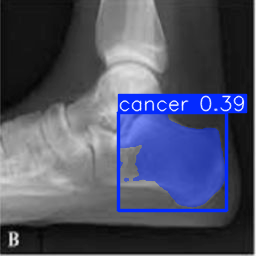

femure_chondrosarcoma_4_PNG.rf.35a0a0cf56e3a0903379ff491b3a23d6.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femure_chondrosarcoma_4_PNG.rf.35a0a0cf56e3a0903379ff491b3a23d6.jpg: 640x640 (no detections), 34.4ms
Speed: 3.0ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


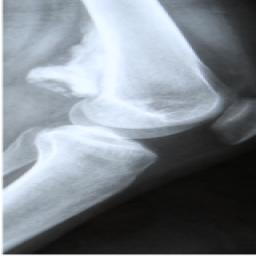

tibia_ewing_20_PNG.rf.dc4b52a23e336bfd3e3f93a6d543af4b.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_ewing_20_PNG.rf.dc4b52a23e336bfd3e3f93a6d543af4b.jpg: 640x640 1 cancer, 42.3ms
Speed: 3.6ms preprocess, 42.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


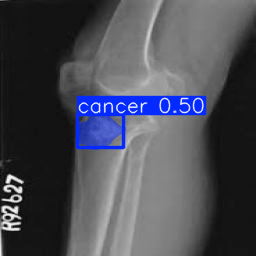

ped_28_png.rf.4dcd0fea99b181fa3e4146455e32425d.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/ped_28_png.rf.4dcd0fea99b181fa3e4146455e32425d.jpg: 640x640 1 cancer, 28.1ms
Speed: 3.0ms preprocess, 28.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


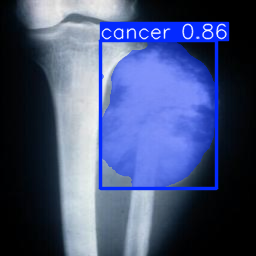

pelvis_chondrosarcoma_9_png.rf.c5f3cc3b9308f309f65444dfa998b734.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/pelvis_chondrosarcoma_9_png.rf.c5f3cc3b9308f309f65444dfa998b734.jpg: 640x640 1 cancer, 30.8ms
Speed: 4.9ms preprocess, 30.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


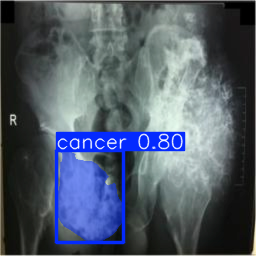

tibia_metastasis_7_PNG.rf.4d883e329ba23f901387c33ef9d691a3.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_metastasis_7_PNG.rf.4d883e329ba23f901387c33ef9d691a3.jpg: 640x640 2 cancers, 32.0ms
Speed: 3.1ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


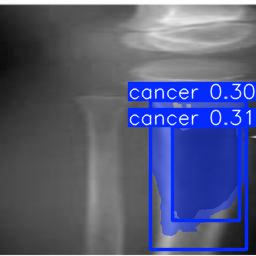

femur_metastasis_16_PNG.rf.395bcc81a4426d91e2191fc7e6fbea7f.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femur_metastasis_16_PNG.rf.395bcc81a4426d91e2191fc7e6fbea7f.jpg: 640x640 1 cancer, 28.6ms
Speed: 3.3ms preprocess, 28.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


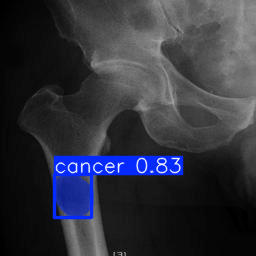

pelvis_other_3_png.rf.0ed6949a5de6c9e026f7102544b54faa.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/pelvis_other_3_png.rf.0ed6949a5de6c9e026f7102544b54faa.jpg: 640x640 (no detections), 32.2ms
Speed: 3.3ms preprocess, 32.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


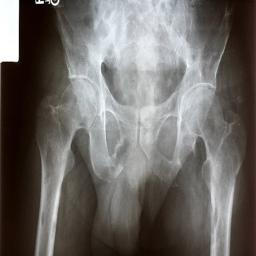

tibia_osteosarcoma_5_PNG.rf.c64994a1389b62a2e5804e38ef56bb5a.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_osteosarcoma_5_PNG.rf.c64994a1389b62a2e5804e38ef56bb5a.jpg: 640x640 1 cancer, 41.4ms
Speed: 3.2ms preprocess, 41.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


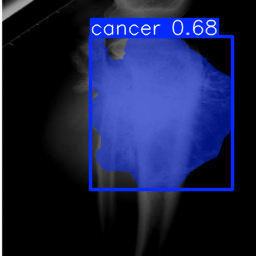

femur_ewing_19_PNG.rf.3904bb329abc718ebc9dcb884213271b.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femur_ewing_19_PNG.rf.3904bb329abc718ebc9dcb884213271b.jpg: 640x640 2 cancers, 43.5ms
Speed: 3.0ms preprocess, 43.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


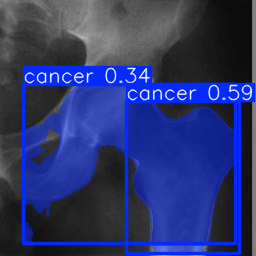

foot_36_png.rf.85590d3f4031cd1acd914d06d221243a.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/foot_36_png.rf.85590d3f4031cd1acd914d06d221243a.jpg: 640x640 1 cancer, 42.7ms
Speed: 5.2ms preprocess, 42.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


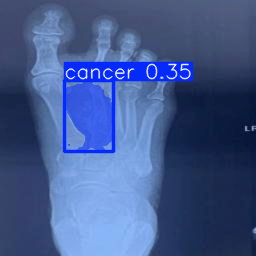

tibia_osteosarcoma_6_PNG.rf.14710829c0e2b4b6c0531985ac184a9c.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_osteosarcoma_6_PNG.rf.14710829c0e2b4b6c0531985ac184a9c.jpg: 640x640 2 cancers, 35.8ms
Speed: 5.0ms preprocess, 35.8ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


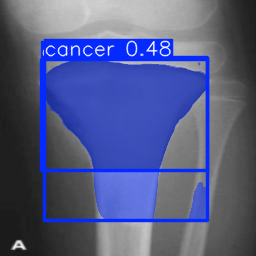

fibula_chondrosarcoma_11_PNG.rf.d23bda292ee06a8b1158f03c97200f83.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/fibula_chondrosarcoma_11_PNG.rf.d23bda292ee06a8b1158f03c97200f83.jpg: 640x640 1 cancer, 28.7ms
Speed: 3.1ms preprocess, 28.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


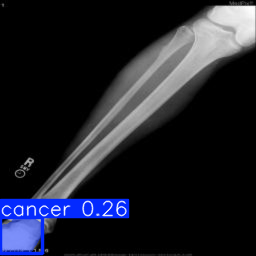

hand_osteosarcoma_12_png.rf.747643729d8b3073f167f80164befe4e.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/hand_osteosarcoma_12_png.rf.747643729d8b3073f167f80164befe4e.jpg: 640x640 1 cancer, 29.4ms
Speed: 2.7ms preprocess, 29.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


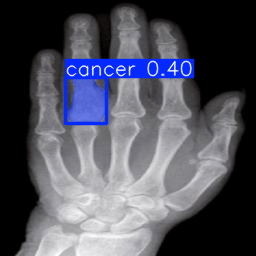

fibula_metastasis_12_png.rf.79b74b5dd8d4b13503437b86f45b9f04.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/fibula_metastasis_12_png.rf.79b74b5dd8d4b13503437b86f45b9f04.jpg: 640x640 1 cancer, 29.3ms
Speed: 3.3ms preprocess, 29.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


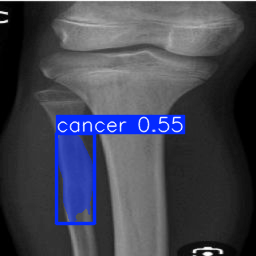

hand_ewing_6_png.rf.460e50a4c9f35d3d92c115ea802034ba.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/hand_ewing_6_png.rf.460e50a4c9f35d3d92c115ea802034ba.jpg: 640x640 1 cancer, 42.8ms
Speed: 2.9ms preprocess, 42.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


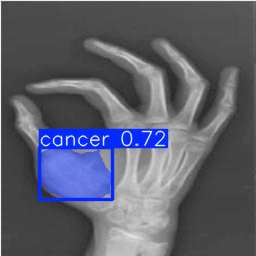

femur_fibrosarcoma_13_PNG.rf.32c907f89e0e25a3ddcd6fc41054317e.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femur_fibrosarcoma_13_PNG.rf.32c907f89e0e25a3ddcd6fc41054317e.jpg: 640x640 (no detections), 42.5ms
Speed: 2.9ms preprocess, 42.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


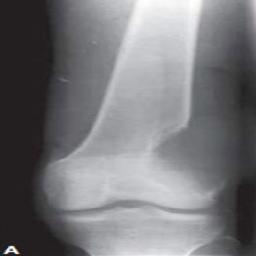

fibula_metastasis_5_png.rf.d3386a5d316382a8b2d024b909388963.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/fibula_metastasis_5_png.rf.d3386a5d316382a8b2d024b909388963.jpg: 640x640 (no detections), 39.2ms
Speed: 4.8ms preprocess, 39.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


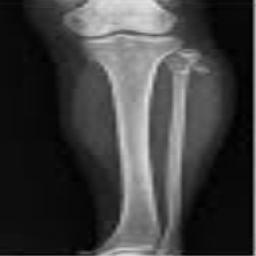

C24_png.rf.63d37a5508fd0dac27994d051fc40e3e.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/C24_png.rf.63d37a5508fd0dac27994d051fc40e3e.jpg: 640x640 1 cancer, 29.4ms
Speed: 3.1ms preprocess, 29.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


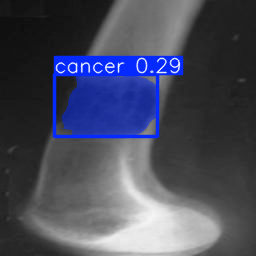

pelvis_osteosarcoma_12_png.rf.7429b7aa97133335916b39cd01fca881.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/pelvis_osteosarcoma_12_png.rf.7429b7aa97133335916b39cd01fca881.jpg: 640x640 1 cancer, 35.4ms
Speed: 3.7ms preprocess, 35.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


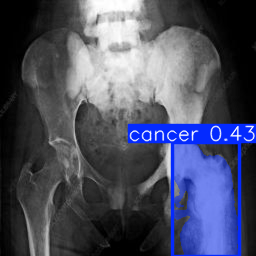

tibia_metastasis_21_PNG.rf.065cbd0f3a561f9a241bfb69feca020b.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_metastasis_21_PNG.rf.065cbd0f3a561f9a241bfb69feca020b.jpg: 640x640 1 cancer, 37.2ms
Speed: 3.0ms preprocess, 37.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


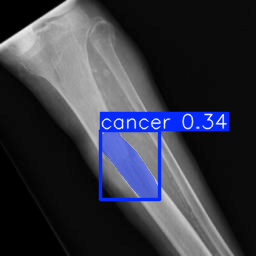

tibia_ewing_16_PNG.rf.8e26cb859a01d6e2dae2e8047e4a9cba.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_ewing_16_PNG.rf.8e26cb859a01d6e2dae2e8047e4a9cba.jpg: 640x640 (no detections), 40.6ms
Speed: 3.9ms preprocess, 40.6ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


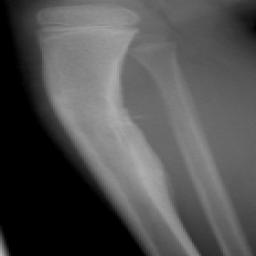

ulna_0thers_3_1_png.rf.04c362f383d7b744f1f572da174c94b3.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/ulna_0thers_3_1_png.rf.04c362f383d7b744f1f572da174c94b3.jpg: 640x640 1 cancer, 44.2ms
Speed: 5.2ms preprocess, 44.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


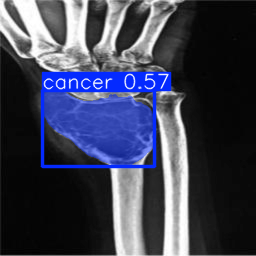

femur_metastasis_2_PNG.rf.5e403a96e9e474cff2643e30a66b6952.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femur_metastasis_2_PNG.rf.5e403a96e9e474cff2643e30a66b6952.jpg: 640x640 1 cancer, 41.4ms
Speed: 3.1ms preprocess, 41.4ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


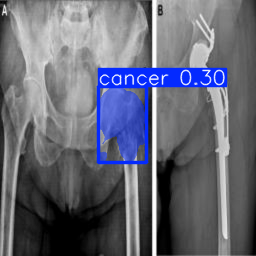

humerus_28_png.rf.93f11de8eb5d82acf74b7836159c8918.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/humerus_28_png.rf.93f11de8eb5d82acf74b7836159c8918.jpg: 640x640 1 cancer, 32.0ms
Speed: 3.2ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


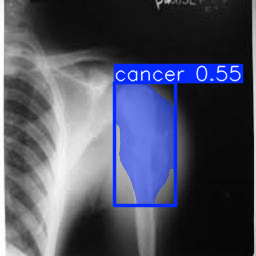

femure_chondrosarcoma_9_PNG.rf.704863df19f0df4d8ce237969e34ade2.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femure_chondrosarcoma_9_PNG.rf.704863df19f0df4d8ce237969e34ade2.jpg: 640x640 1 cancer, 43.5ms
Speed: 3.4ms preprocess, 43.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


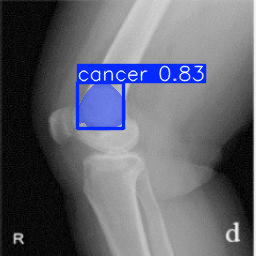

foot_42_png.rf.aec6946ebd38a371ab16c10a78123b71.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/foot_42_png.rf.aec6946ebd38a371ab16c10a78123b71.jpg: 640x640 (no detections), 37.5ms
Speed: 3.2ms preprocess, 37.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


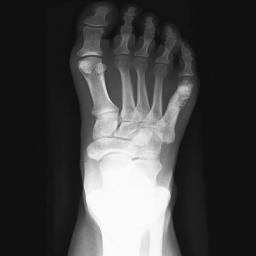

hand_encondroma_11_png.rf.53b83ad6adc5f056eb212452208129b1.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/hand_encondroma_11_png.rf.53b83ad6adc5f056eb212452208129b1.jpg: 640x640 2 cancers, 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


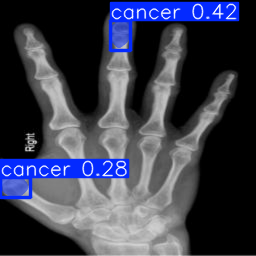

C13_png.rf.e31bcf9bd08d497500c48dacf4d106c4.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/C13_png.rf.e31bcf9bd08d497500c48dacf4d106c4.jpg: 640x640 1 cancer, 36.5ms
Speed: 3.1ms preprocess, 36.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


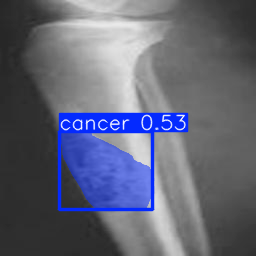

humerus_22_png.rf.5973e8ec9f8567c73e114339bb4f7a17.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/humerus_22_png.rf.5973e8ec9f8567c73e114339bb4f7a17.jpg: 640x640 (no detections), 36.4ms
Speed: 3.2ms preprocess, 36.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


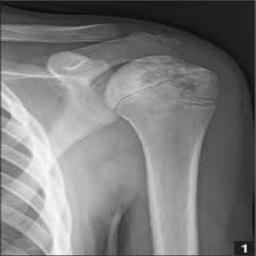

C45_png.rf.3ff5166b362282d1913a67ec6d9ded56.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/C45_png.rf.3ff5166b362282d1913a67ec6d9ded56.jpg: 640x640 3 cancers, 32.2ms
Speed: 4.1ms preprocess, 32.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


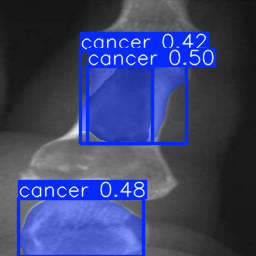

tibia_other_6_PNG.rf.ecf0bbd9680ee21a73aadb09148c8a02.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_other_6_PNG.rf.ecf0bbd9680ee21a73aadb09148c8a02.jpg: 640x640 1 cancer, 32.0ms
Speed: 3.1ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


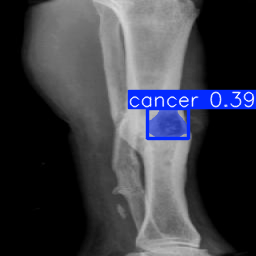

foot_7_png.rf.096fadd6bb20758810ad0a39c9ce7da9.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/foot_7_png.rf.096fadd6bb20758810ad0a39c9ce7da9.jpg: 640x640 (no detections), 32.4ms
Speed: 3.5ms preprocess, 32.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


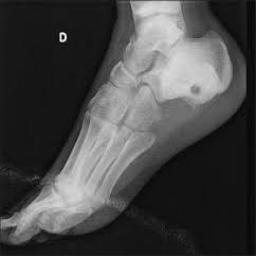

fibula_chondrosarcoma_12_PNG.rf.55240540cee07a72199997545596b93d.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/fibula_chondrosarcoma_12_PNG.rf.55240540cee07a72199997545596b93d.jpg: 640x640 1 cancer, 46.3ms
Speed: 3.0ms preprocess, 46.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


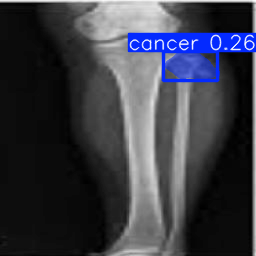

pelvis_osteosarcoma_19_png.rf.a0a586ef33b171ac204f79cef52202b8.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/pelvis_osteosarcoma_19_png.rf.a0a586ef33b171ac204f79cef52202b8.jpg: 640x640 (no detections), 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


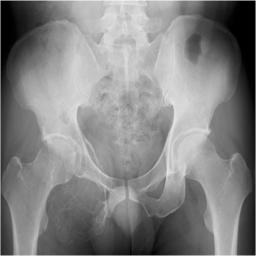

humerus_25_png.rf.65d7b5c31a9acd21c4bdc1a2bef12e47.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/humerus_25_png.rf.65d7b5c31a9acd21c4bdc1a2bef12e47.jpg: 640x640 (no detections), 34.6ms
Speed: 3.0ms preprocess, 34.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


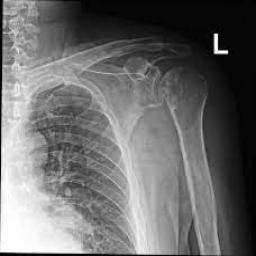

hand_osteosarcoma_3_png.rf.0a74ff49af754249f04da2c08301e7dc.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/hand_osteosarcoma_3_png.rf.0a74ff49af754249f04da2c08301e7dc.jpg: 640x640 2 cancers, 32.4ms
Speed: 2.8ms preprocess, 32.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


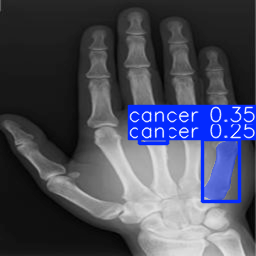

femur_metastasis_17_PNG.rf.f050e92560828f1e706ae61944b26f3d.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femur_metastasis_17_PNG.rf.f050e92560828f1e706ae61944b26f3d.jpg: 640x640 1 cancer, 34.9ms
Speed: 4.5ms preprocess, 34.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


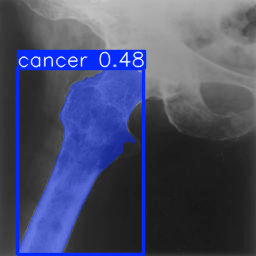

foot_6_png.rf.dc4241ca227dce7fcf135668a3cce7f0.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/foot_6_png.rf.dc4241ca227dce7fcf135668a3cce7f0.jpg: 640x640 2 cancers, 39.7ms
Speed: 4.5ms preprocess, 39.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


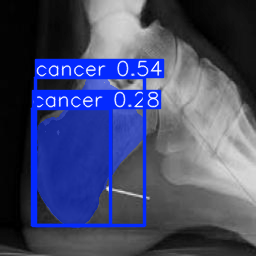

fibula_ewing_13_png.rf.a3bd88efc7006bf135748f7c42bfb146.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/fibula_ewing_13_png.rf.a3bd88efc7006bf135748f7c42bfb146.jpg: 640x640 1 cancer, 33.0ms
Speed: 3.5ms preprocess, 33.0ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


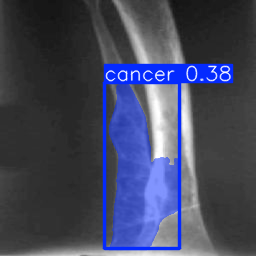

foot_85_png.rf.19fb65c71d4b8f11b40a6c3f5f8d0075.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/foot_85_png.rf.19fb65c71d4b8f11b40a6c3f5f8d0075.jpg: 640x640 (no detections), 38.3ms
Speed: 3.0ms preprocess, 38.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


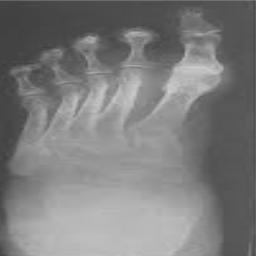

pelvis_osteosarcoma_9_png.rf.183d3323c6022f18a1eef4cce96d51eb.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/pelvis_osteosarcoma_9_png.rf.183d3323c6022f18a1eef4cce96d51eb.jpg: 640x640 (no detections), 32.7ms
Speed: 2.8ms preprocess, 32.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


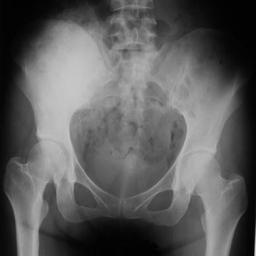

tibia_other_14_PNG.rf.b410989c13ddf47606d19bd34d371d70.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_other_14_PNG.rf.b410989c13ddf47606d19bd34d371d70.jpg: 640x640 (no detections), 31.7ms
Speed: 3.3ms preprocess, 31.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


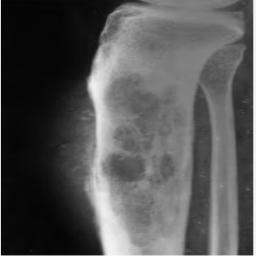

pelvis_osteosarcoma_5_png.rf.26807c133226bc81b586d9f8ae32b8c0.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/pelvis_osteosarcoma_5_png.rf.26807c133226bc81b586d9f8ae32b8c0.jpg: 640x640 1 cancer, 34.0ms
Speed: 2.9ms preprocess, 34.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


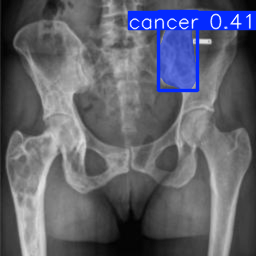

C19_png.rf.9289183946389211e4f5847c4cd0e278.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/C19_png.rf.9289183946389211e4f5847c4cd0e278.jpg: 640x640 2 cancers, 39.9ms
Speed: 2.8ms preprocess, 39.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


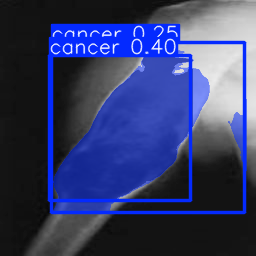

foot_34_png.rf.d5dd50f4dd1ffa0f5d44fb5567de1d27.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/foot_34_png.rf.d5dd50f4dd1ffa0f5d44fb5567de1d27.jpg: 640x640 (no detections), 39.6ms
Speed: 2.9ms preprocess, 39.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


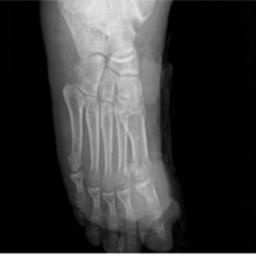

ulna_0thers_6_png.rf.e8d698759c3fc833f72f77257f33b6b1.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/ulna_0thers_6_png.rf.e8d698759c3fc833f72f77257f33b6b1.jpg: 640x640 2 cancers, 39.5ms
Speed: 3.1ms preprocess, 39.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


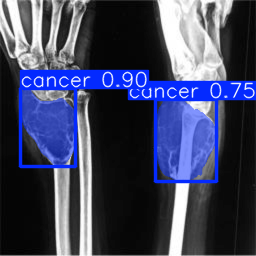

ped_12_png.rf.6b8205ec1c7c3d10a694888dee986999.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/ped_12_png.rf.6b8205ec1c7c3d10a694888dee986999.jpg: 640x640 1 cancer, 38.0ms
Speed: 6.7ms preprocess, 38.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


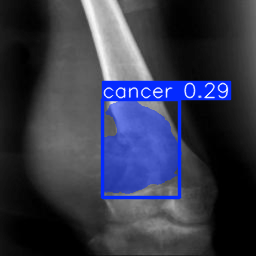

humerus_41_png.rf.86c49ad24369ffc0dfd6a241d25d69f6.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/humerus_41_png.rf.86c49ad24369ffc0dfd6a241d25d69f6.jpg: 640x640 3 cancers, 29.7ms
Speed: 3.8ms preprocess, 29.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


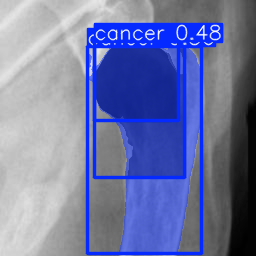

femur_metastasis_13_PNG.rf.02bf41052388aa997d8ca1b31999808b.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/femur_metastasis_13_PNG.rf.02bf41052388aa997d8ca1b31999808b.jpg: 640x640 1 cancer, 29.6ms
Speed: 3.3ms preprocess, 29.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


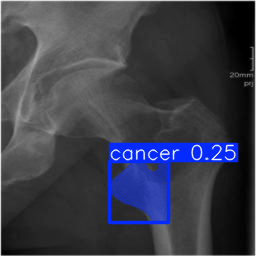

tibia_osteosarcoma_10_PNG.rf.55d4ace91376a42785e3c15940e9c5b1.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_osteosarcoma_10_PNG.rf.55d4ace91376a42785e3c15940e9c5b1.jpg: 640x640 2 cancers, 29.5ms
Speed: 3.2ms preprocess, 29.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


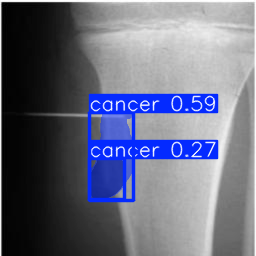

humerus_49_png.rf.d252f76c3d3a4b370f72b84ae36d4be8.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/humerus_49_png.rf.d252f76c3d3a4b370f72b84ae36d4be8.jpg: 640x640 (no detections), 31.8ms
Speed: 4.8ms preprocess, 31.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


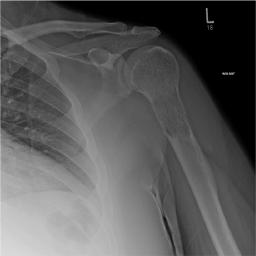

foot_8_png.rf.dadd6641e0e4c1034f4fc6d0b7f6c05b.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/foot_8_png.rf.dadd6641e0e4c1034f4fc6d0b7f6c05b.jpg: 640x640 2 cancers, 29.9ms
Speed: 3.3ms preprocess, 29.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


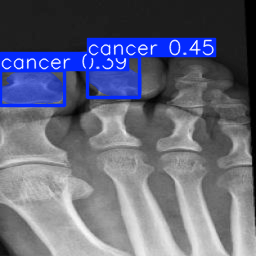

hand_ewing_1_png.rf.bd0ad0b1ffd4bb2952aedde4e63bcdab.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/hand_ewing_1_png.rf.bd0ad0b1ffd4bb2952aedde4e63bcdab.jpg: 640x640 1 cancer, 28.7ms
Speed: 3.0ms preprocess, 28.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


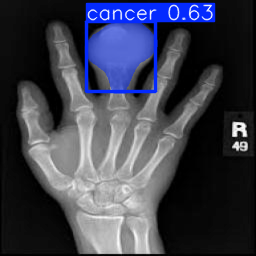

tibia_other_17_PNG.rf.d9df8db0ff83094f821241556185e7dd.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_other_17_PNG.rf.d9df8db0ff83094f821241556185e7dd.jpg: 640x640 (no detections), 30.3ms
Speed: 3.0ms preprocess, 30.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


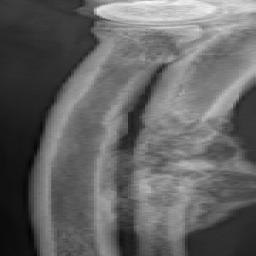

foot_86_png.rf.891aa0b2c43f83a033fb83970497b60f.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/foot_86_png.rf.891aa0b2c43f83a033fb83970497b60f.jpg: 640x640 (no detections), 30.8ms
Speed: 4.8ms preprocess, 30.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


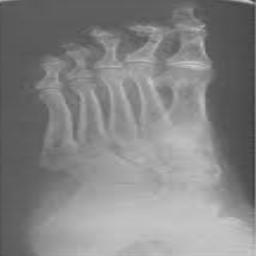

ulna_0thers_3_2_png.rf.cfb4a70609a58f60dfc34b41cd396f9a.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/ulna_0thers_3_2_png.rf.cfb4a70609a58f60dfc34b41cd396f9a.jpg: 640x640 1 cancer, 29.3ms
Speed: 3.1ms preprocess, 29.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


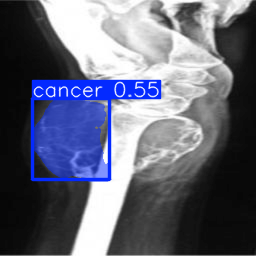

tibia_ewing_13_PNG.rf.92a50fcea0e7194819e51435a37b4f64.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_ewing_13_PNG.rf.92a50fcea0e7194819e51435a37b4f64.jpg: 640x640 (no detections), 29.7ms
Speed: 3.1ms preprocess, 29.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


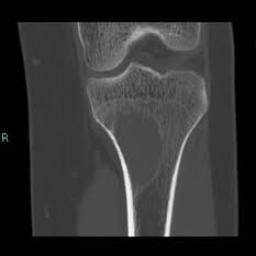

C40_png.rf.aba9ad718f294a72870ea6e7f3209a13.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/C40_png.rf.aba9ad718f294a72870ea6e7f3209a13.jpg: 640x640 (no detections), 30.2ms
Speed: 3.2ms preprocess, 30.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


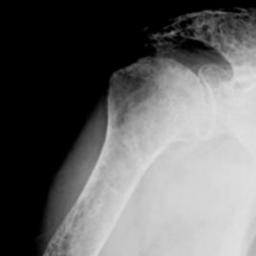

tibia_metastasis_23_PNG.rf.503cb6ac1069a244c7f173cc372aabd5.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/tibia_metastasis_23_PNG.rf.503cb6ac1069a244c7f173cc372aabd5.jpg: 640x640 1 cancer, 40.9ms
Speed: 4.2ms preprocess, 40.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


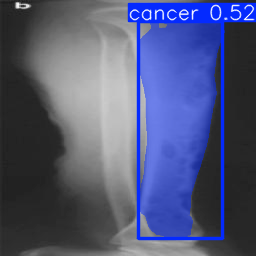

fibula_ewing_25_png.rf.f35f05a1df1d680db5eec3d397b91b87.jpg

image 1/1 /content/BONE-CANCER-SEGMENTATION-1/test/images/fibula_ewing_25_png.rf.f35f05a1df1d680db5eec3d397b91b87.jpg: 640x640 1 cancer, 39.3ms
Speed: 4.0ms preprocess, 39.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


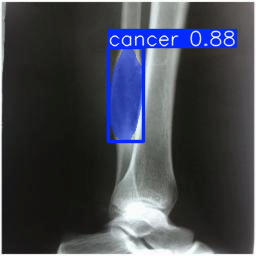

In [ ]:
from ultralytics import YOLO
import os

_dir = '/content/BONE-CANCER-SEGMENTATION-1/test/images'

# trained_model = '/content/runs/segment/train2/weights/best.pt'
trained_model = '/content/best_11l_seg.pt'

# image = _dir + '/' + 'C45_png.rf.3ff5166b362282d1913a67ec6d9ded56.jpg'
# image = 'anu-cool.jpg'

model = YOLO(trained_model)

# results = model.predict(image, save=False)
# print(results[0].boxes.conf) #we will have to manually check the conf and plot boxex and masks accordingly using cv2
# results[0].show()

for image in os.listdir(_dir):
  print(image)
  results = model.predict(_dir+'/'+image, save=True)
# for result in results:
  results[0].show()

In [ ]:
import os
from ultralytics import YOLO

# Load the trained YOLOv8 model
model_path = "/content/best5.pt"  # Update with your model path
model = YOLO(model_path)

# Define the path to your test dataset
data_yaml_path = "/content/BONE-CANCER-SEGMENTATION-1/data.yaml"  # Update with your data YAML path

# Run the validation process to obtain metrics
metrics = model.val(data=data_yaml_path)  # Use the 'val' function

# Print the results
print(metrics.box.map50)  # Mean Average Precision (mAP@0.5)
print(metrics.box.map)    # Mean Average Precision (mAP@0.5:0.95)
print(metrics.box.p)     # Precision
print(metrics.box.r)     # Recall
print(metrics.box.f1)   #f1 score

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /content/BONE-CANCER-SEGMENTATION-1/valid/labels.cache... 72 images, 1 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


                   all         72         76      0.605      0.434       0.48      0.189      0.623      0.447      0.493      0.183
Speed: 5.6ms preprocess, 7.6ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/val4
0.48045892438856086
0.18906966102330386
[    0.60494]
[    0.43421]
[    0.50555]


In [ ]:
from google.colab import files
files.download('/content/runs/segment/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

eigen cam


In [ ]:
%pip install datature
%pip install dill
%pip install ttach
%pip install ultralytics
%pip install torch
%pip install wget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.3 MB/s eta 0:00:00
  Created wheel for halo: filename=halo-0.0.31-py3-none-any.whl size=11233 sha256=8fa3ecfe69a0ca513b60dbea04e082116a8f23243

In [ ]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git


Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 82 (delta 9), reused 14 (delta 5), pack-reused 57 (from 1)
Receiving objects: 100% (82/82), 29.78 MiB | 28.50 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
%cd YOLO-V8-CAM/

/content/YOLO-V8-CAM


In [ ]:
!pip install .

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
%%writefile setup.py
import setuptools

with open("README.md", "r") as fh:
    long_description = fh.read()

setuptools.setup(
    name="yolov8_cam",
    version="0.0.1",
    author="Rigved Raizada",
    author_email="rigved.raizada@gmail.com",
    description="A package for applying EigenCAM on the new YOLO V8 model",
    long_description=long_description,
    long_description_content_type="text/markdown",
    url="https://github.com/rigvedrs/YOLO-V8-CAM",
    packages=setuptools.find_packages(),
    classifiers=[
        "Programming Language :: Python :: 3",
        "License :: OSI Approved :: MIT License",
        "Operating System :: OS Independent",
    ],
    python_requires='>=3.6',
)

Overwriting setup.py


In [ ]:
!pip install .

Processing /content/YOLO-V8-CAM
  Preparing metadata (setup.py) ... done
  Created wheel for yolov8_cam: filename=yolov8_cam-0.0.1-py3-none-any.whl size=3540 sha256=da265f9a0f2616458bb284863b740e944694bbb8061d477adcf238c4e31f70c4
  Stored in directory: /root/.cache/pip/wheels/76/f1/94/8361aae3d16ec30a7c867972cbd1eb135564e910e1f2819ab2
Successfully built yolov8_cam


In [ ]:
import os
from zipfile import ZipFile

import cv2
import datature
import matplotlib.pyplot as plt
import numpy as np
import wget
from ultralytics import YOLO
from yolov8_cam.eigen_cam import EigenCAM # This should work now
from yolov8_cam.utils.image import show_cam_on_image

ModuleNotFoundError: No module named 'yolov8_cam'